![](https://images.aicrowd.com/raw_images/challenges/banner_file/1004/51b3abd65e4964c62778.jpg)

<h2><center> Getting Started with Speaker Identification</center></h2>

In this puzzle, we have to cluster the sentences spoken by same speaker together. 

In this starter notebook:
> For tokenization: We will use **TfidfVectorizer**. 

> For Clustering: We will use **K Means Classifier**.




# Download the files 💾
## Download AIcrowd CLI

We will first install aicrowd-cli which will help you download and later make submission directly via the notebook.


In [ ]:
!pip install aicrowd-cli
%load_ext aicrowd.magic

     |████████████████████████████████| 44 kB 2.2 MB/s 
     |████████████████████████████████| 1.1 MB 9.9 MB/s 
     |████████████████████████████████| 62 kB 811 kB/s 
     |████████████████████████████████| 54 kB 2.7 MB/s 
     |████████████████████████████████| 170 kB 52.4 MB/s 
     |████████████████████████████████| 214 kB 45.7 MB/s 
     |████████████████████████████████| 63 kB 1.5 MB/s 
     |████████████████████████████████| 51 kB 6.8 MB/s 
  Attempting uninstall: requests
    Found existing installation: requests 2.23.0
    Uninstalling requests-2.23.0:
      Successfully uninstalled requests-2.23.0
  Attempting uninstall: pyzmq
    Found existing installation: pyzmq 22.3.0
    Uninstalling pyzmq-22.3.0:
      Successfully uninstalled pyzmq-22.3.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-colab 1.0.0 requires requests~=2.23.0, but you have


## Login to AIcrowd ㊗


In [ ]:
%aicrowd login

Please login here: https://api.aicrowd.com/auth/3FVg4wwyvurUqEL3VlY1JSlr9I5G1B7OcvbPyXojHQg
API Key valid
Saved API Key successfully!



## Download Dataset

We will create a folder name data and download the files there.


In [ ]:
!rm -rf data
!mkdir data
%aicrowd ds dl -c speaker-identification -o data

sample_sub.csv:   0%|          | 0.00/10.4k [00:00<?, ?B/s]

test.csv:   0%|          | 0.00/424k [00:00<?, ?B/s]

In [ ]:
import re,os
import pandas as pd

from wordcloud import WordCloud

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans

In [ ]:
test_df = pd.read_csv("data/test.csv")

In [ ]:
test_df.head()

id                                           sentence
0  19475  If you sit back and think about all that, that...
1  35980  oh my goodness i've run it again i wasn't mean...
2  12979  So I think that the whole world has moved towa...
3  40815  since I think it would be lame to not post any...
4  43475  And now, let’s use this new technique to\nappl...

In [ ]:
test_df.sentence[0]

"If you sit back and think about all that, that’s a lot of layers of complexity to wrap your mind around. So don't worry if it takes time for your mind to digest it all."

In [ ]:
sub_df = pd.read_csv("data/sample_sub.csv")

In [ ]:
sub_df.head()

id  prediction
0  19475         NaN
1  35980         NaN
2  12979         NaN
3  40815         NaN
4  43475         NaN

In [ ]:
# Remove punctuation, new line and lower case all the text available in sentence
test_df.sentence = test_df.sentence.apply(lambda x: re.sub('[,\.!?]', '', x))
test_df.sentence = test_df.sentence.apply(lambda x: x.lower())
test_df.sentence = test_df.sentence.apply(lambda x: x.replace("\n", " "))

In [ ]:
test_df.head()

id                                           sentence
0  19475  if you sit back and think about all that that’...
1  35980  oh my goodness i've run it again i wasn't mean...
2  12979  so i think that the whole world has moved towa...
3  40815  since i think it would be lame to not post any...
4  43475  and now let’s use this new technique to apply ...

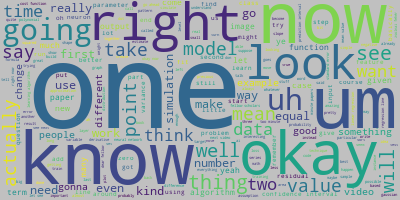

In [ ]:
long_string = ','.join(list(test_df.sentence.values))

# Create a WordCloud object
wordcloud = WordCloud(background_color="silver", max_words=1000, contour_width=3, contour_color='steelblue')

# Generate a word cloud
wordcloud.generate(long_string)

# Visualize the word cloud
wordcloud.to_image()

In [ ]:
vectorizer = TfidfVectorizer(stop_words='english')
X = vectorizer.fit_transform(test_df.sentence)

In [ ]:
print(type(X))

<class 'scipy.sparse.csr.csr_matrix'>


# Generating Predictions
Clustering using K-Means.

In [ ]:
true_k = 10
model = KMeans(n_clusters=true_k, init='k-means++', max_iter=100)

In [ ]:
model.fit(X)

KMeans(max_iter=100, n_clusters=10)

In [ ]:
submission = test_df

In [ ]:
submission['prediction'] = test_df.sentence.apply(lambda x: model.predict(vectorizer.transform([x])[0])[0])

In [ ]:
submission.head()

id                                           sentence  prediction
0  19475  if you sit back and think about all that that’...           0
1  35980  oh my goodness i've run it again i wasn't mean...           0
2  12979  so i think that the whole world has moved towa...           0
3  40815  since i think it would be lame to not post any...           0
4  43475  and now let’s use this new technique to apply ...           1

In [ ]:
!rm -rf assets
!mkdir assets
submission.to_csv(os.path.join("assets", "submission.csv"))


# Submitting our Predictions

Note : Please save the notebook before submitting it (Ctrl + S)


In [ ]:
%aicrowd notebook submit -c speaker-identification -a assets --no-verify

Using notebook: getting-started-notebook-for-speaker-identification.ipynb for submission...
Scrubbing API keys from the notebook...


Output()

╭─────────────────────────╮                                                      
                                                     │ Successfully submitted! │                                                      
                                                     ╰─────────────────────────╯

                                                           Important links                                                            
┌──────────────────┬─────────────────────────────────────────────────────────────────────────────────────────────────────────────────┐
│  This submission │ https://www.aicrowd.com/challenges/ai-blitz-xii/problems/speaker-identification/submissions/169595              │
│                  │                                                                                                                 │
│  All submissions │ https://www.aicrowd.com/challenges/ai-blitz-xii/problems/speaker-identification/submissions?my_submissions=true │
│                  │                                                                                                                 │
│      Leaderboard │ https://www.aicrowd.com/challenges/ai-blitz-xii/problems/speaker-identification/leaderboards                    │
│                  │                                                                                                                 │
│ Discussion forum │ https://discourse.aicrowd.com/c/ai-blitz-xii                                                                    │
│                  │                                                                                                                 │
│   Challenge page │ https://www.aicrowd.com/challenges/ai-blitz-xii/problems/speaker-identification                                 │
└──────────────────┴─────────────────────────────────────────────────────────────────────────────────────────────────────────────────┘